# 분류기(CLASSIFIER) 학습하기
신경망은 torch.nn 패키지를 사용하여 생성할 수 있습니다.

일반적으로 이미지나 텍스트, 오디오나 비디오 데이터를 다룰 때는 표준 Python 패키지를 이용하여 NumPy 배열로 불러오면 됩니다. 그 후 그 배열을 torch.*Tensor 로 변환합니다.

이미지는 Pillow나 OpenCV 같은 패키지가 유용합니다.

오디오를 처리할 때는 SciPy와 LibROSA가 유용하고요.

텍스트의 경우에는 그냥 Python이나 Cython을 사용해도 되고, NLTK나 SpaCy도 유용합니다.

특별히 영상 분야를 위한 torchvision 이라는 패키지가 만들어져 있는데, 여기에는 Imagenet이나 CIFAR10, MNIST 등과 같이 일반적으로 사용하는 데이터셋을 위한 데이터 로더(data loader), 즉 torchvision.datasets 과 이미지용 데이터 변환기 (data transformer), 즉 torch.utils.data.DataLoader 가 포함되어 있습니다.

이러한 기능은 엄청나게 편리하며, 매번 유사한 코드(boilerplate code)를 반복해서 작성하는 것을 피할 수 있습니다.

이 튜토리얼에서는 CIFAR10 데이터셋을 사용합니다. 여기에는 다음과 같은 분류들이 있습니다: ‘비행기(airplane)’, ‘자동차(automobile)’, ‘새(bird)’, ‘고양이(cat)’, ‘사슴(deer)’, ‘개(dog)’, ‘개구리(frog)’, ‘말(horse)’, ‘배(ship)’, ‘트럭(truck)’. 그리고 CIFAR10에 포함된 이미지의 크기는 3x32x32로, 이는 32x32 픽셀 크기의 이미지가 3개 채널(channel)의 색상로 이뤄져 있다는 것을 뜻합니다.

![예시](https://tutorials.pytorch.kr/_images/cifar10.png)


## 이미지 분류기 학습허기

다음과 같은 단계로 진행해보겠습니다:

1. torchvision 을 사용하여 CIFAR10의 학습용 / 시험용 데이터셋을 불러오고, 정규화(nomarlizing)합니다.

2. 합성곱 신경망(Convolution Neural Network)을 정의합니다.

3. 손실 함수를 정의합니다.

4. 학습용 데이터를 사용하여 신경망을 학습합니다.

5. 시험용 데이터를 사용하여 신경망을 검사합니다


### 1) CIFAR10를 불러오고 정규화하기

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

torchvision 데이터셋의 출력(output)은 [0, 1] 범위를 갖는 PILImage 이미지입니다. 이를 [-1, 1]의 범위로 정규화된 Tensor로 변환합니다.

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                       download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4,
                                         shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                      download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                        shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'pig', 'cow', 'ship', 'truck')

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


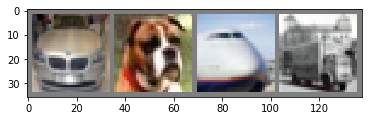

  car   dog plane truck


In [7]:
import matplotlib.pyplot as plt
import numpy as np


# 이미지 보여주는 함수

def imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# 학습용 이미지 랜덤으로 가져오가
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 2) 합성곱 신경망(Convolution Neyral Network) 정의하기